<a href="https://colab.research.google.com/github/thabied/PV_Thermography/blob/master/PV_Thermography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Restructure

In [ ]:
import os
import json
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random
import pandas as pd
from PIL import Image

In [ ]:
datasets = [
    '/content/drive/My Drive/PV_Thermography/dataset_1',
    '/content/drive/My Drive/PV_Thermography/dataset_2'
]

Defected Modules - 20180630_154523.jpg


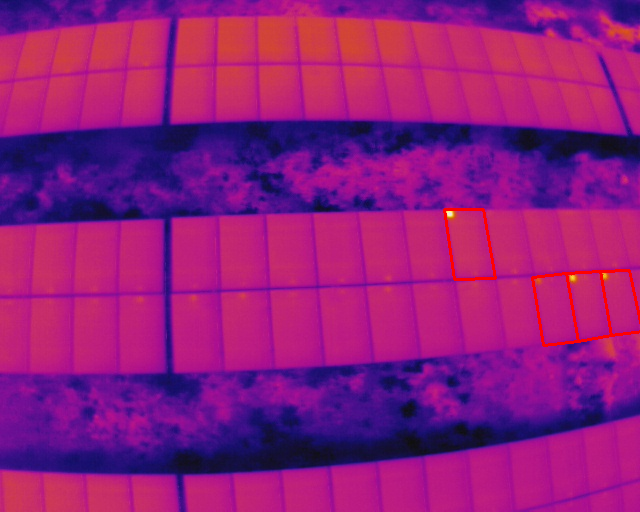

Defected Modules - 20180630_154609.jpg


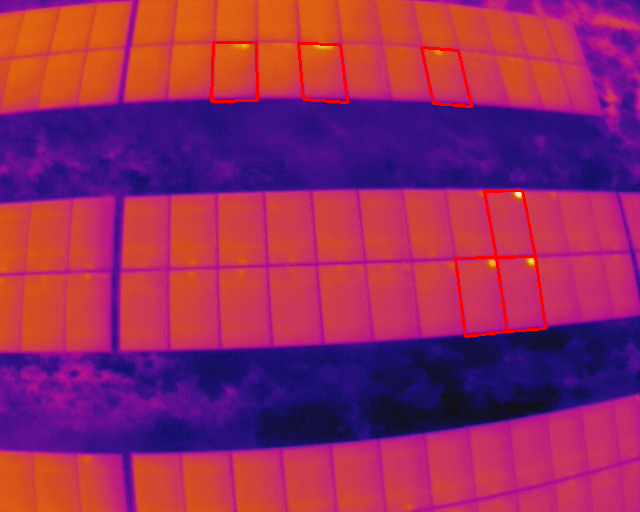

Defected Modules - 20180630_154549.jpg


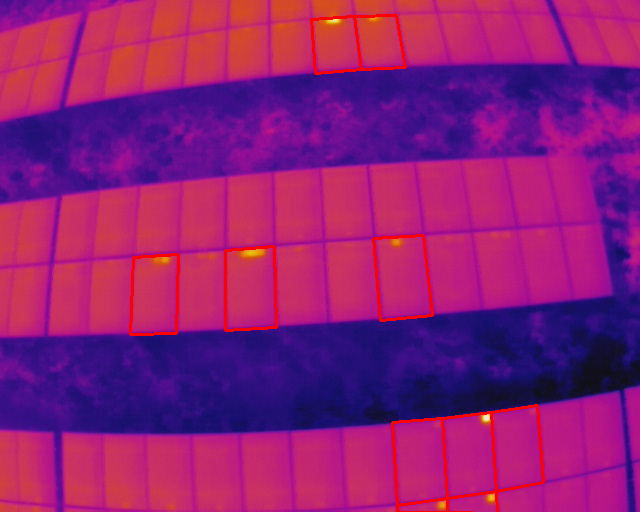

In [ ]:
def show_defects(dataset_path):

    images_path = os.path.join(dataset_path, 'images')
    annotations_path = os.path.join(dataset_path, 'annotations')

    defected_images = []

    for json_file in os.listdir(annotations_path):
        if json_file.endswith('.json'):
            with open(os.path.join(annotations_path, json_file), 'r') as f:
                data = json.load(f)

            defected_instances = [instance for instance in data['instances'] if instance['defected_module']]

            if defected_instances:
                image_file = json_file.replace('.json', '.jpg')
                image_path = os.path.join(images_path, image_file)

                if os.path.exists(image_path):
                    defected_images.append((image_path, defected_instances))

    return defected_images

def visualize_image(image_path, defected_instances):
    image = cv2.imread(image_path)

    for instance in defected_instances:
        corners = np.array([(int(corner['x']), int(corner['y'])) for corner in instance['corners']])
        cv2.polylines(image, [corners], True, (0, 0, 255), 2)

    print(f"Defected Modules - {os.path.basename(image_path)}")
    cv2_imshow(image)

# Collect all defected images from both datasets
all_defected_images = []
for dataset_path in datasets:
    all_defected_images.extend(show_defects(dataset_path))

# Randomly select 3 images (or less if there are fewer than 3)
num_images_to_show = min(3, len(all_defected_images))
selected_images = random.sample(all_defected_images, num_images_to_show)

# Visualize the selected images
for image_path, defected_instances in selected_images:
    visualize_image(image_path, defected_instances)

In [ ]:
def load_dataset(dataset_path):

  data = []
  image_dir = os.path.join(dataset_path, 'images')
  annotation_dir = os.path.join(dataset_path, 'annotations')

  for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    annotation_file = os.path.join(annotation_dir, image_file.replace('.jpg', '.json'))

    with open(annotation_file, 'r') as f:
      annotation_data = json.load(f)

    for instance in annotation_data['instances']:
      data.append({
        'image_path': image_path,
        'annotation_path': annotation_file,
        'defected_module': instance['defected_module']
      })

  return pd.DataFrame(data)

In [ ]:
df = pd.concat([load_dataset(dataset) for dataset in datasets], ignore_index=True)

In [ ]:
df.head()

,image_path,annotation_path,defected_module
0,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
1,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
2,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
3,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
4,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False


In [ ]:
df['image_path'][0]

'/content/drive/My Drive/PV_Thermography/dataset_1/images/008R.jpg'

In [ ]:
df[df['image_path'] == '/content/drive/My Drive/PV_Thermography/dataset_1/images/001R.jpg']

,image_path,annotation_path,defected_module
433,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
434,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
435,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
436,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
437,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
438,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
439,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
440,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
441,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
442,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False


In [ ]:
df['annotation_path'][0]

'/content/drive/My Drive/PV_Thermography/dataset_1/annotations/008R.json'

In [ ]:
df.describe()

,image_path,annotation_path,defected_module
count,5469,5469,5469
unique,137,137,2
top,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
freq,97,97,5379


In [ ]:
len(df[df['defected_module'] == True])

90

In [ ]:
len(df[df['defected_module'] == False])

5379

In [ ]:
grouped_df = df.groupby(['image_path', 'annotation_path'])['defected_module'].any().reset_index()

In [ ]:
grouped_df.head()

,image_path,annotation_path,defected_module
0,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
1,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,True
2,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
3,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
4,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False


In [ ]:
grouped_df['image_path'][0]

'/content/drive/My Drive/PV_Thermography/dataset_1/images/001R.jpg'

In [ ]:
grouped_df['annotation_path'][0]

'/content/drive/My Drive/PV_Thermography/dataset_1/annotations/001R.json'

In [ ]:
grouped_df.describe()

,image_path,annotation_path,defected_module
count,137,137,137
unique,137,137,2
top,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,False
freq,1,1,97


In [ ]:
len(grouped_df[grouped_df['defected_module'] == True])

40

In [ ]:
len(grouped_df[grouped_df['defected_module'] == False])

97

In [ ]:
defected_df = grouped_df[grouped_df['defected_module'] == True]

In [ ]:
defected_df.describe()

,image_path,annotation_path,defected_module
count,40,40,40
unique,40,40,1
top,/content/drive/My Drive/PV_Thermography/datase...,/content/drive/My Drive/PV_Thermography/datase...,True
freq,1,1,40


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
# Split the DataFrame into train, val, and test sets
train_df, temp_df = train_test_split(defected_df, test_size=0.2, random_state=42, stratify=defected_df['defected_module'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['defected_module'])

In [ ]:
yolo_dataset_path = '/content/drive/My Drive/PV_Thermography/yolo_dataset'
train_images_dir = os.path.join(yolo_dataset_path, 'images/train')
val_images_dir = os.path.join(yolo_dataset_path, 'images/val')
test_images_dir = os.path.join(yolo_dataset_path, 'images/test')

train_labels_dir = os.path.join(yolo_dataset_path, 'labels/train')
val_labels_dir = os.path.join(yolo_dataset_path, 'labels/val')
test_labels_dir = os.path.join(yolo_dataset_path, 'labels/test')

In [ ]:
def copy_files(data_frame, image_dest, label_dest):

  for _, row in data_frame.iterrows():
    shutil.copy(row['image_path'], image_dest)
    shutil.copy(row['annotation_path'], label_dest)

In [ ]:
copy_files(train_df, train_images_dir, train_labels_dir)
copy_files(val_df, val_images_dir, val_labels_dir)
copy_files(test_df, test_images_dir, test_labels_dir)

In [ ]:
print(f"Train images: {len(os.listdir(train_images_dir))}, Train labels: {len(os.listdir(train_labels_dir))}")
print(f"Validation images: {len(os.listdir(val_images_dir))}, Validation labels: {len(os.listdir(val_labels_dir))}")
print(f"Test images: {len(os.listdir(test_images_dir))}, Test labels: {len(os.listdir(test_labels_dir))}")

Train images: 32, Train labels: 32
Validation images: 4, Validation labels: 4
Test images: 4, Test labels: 4


In [ ]:
def normalize_and_check_coordinates(json_path):
    # Read the JSON file
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Find the image dimensions
    all_x = []
    all_y = []
    for instance in data['instances']:
        for corner in instance['corners']:
            all_x.append(corner['x'])
            all_y.append(corner['y'])

    image_width = max(all_x)
    image_height = max(all_y)

    print(f"Inferred image dimensions: {image_width}x{image_height}")

    # Function to normalize a single coordinate
    def normalize_coordinate(value, dimension):
        normalized = value / dimension
        if normalized < 0 or normalized > 1:
            print(f"Warning: Normalized value {normalized} is out of range [0, 1]")
        return max(0, min(1, normalized))

    # Normalize and check coordinates for each instance
    for i, instance in enumerate(data['instances']):
        print(f"\nProcessing instance {i+1}:")

        # Normalize corners
        normalized_corners = []
        for corner in instance['corners']:
            norm_x = normalize_coordinate(corner['x'], image_width)
            norm_y = normalize_coordinate(corner['y'], image_height)
            normalized_corners.append({"x": norm_x, "y": norm_y})

        # Normalize center
        norm_center_x = normalize_coordinate(instance['center']['x'], image_width)
        norm_center_y = normalize_coordinate(instance['center']['y'], image_height)

        print(f"Normalized corners: {normalized_corners}")
        print(f"Normalized center: ({norm_center_x}, {norm_center_y})")
        print(f"Defected module: {instance['defected_module']}")

In [ ]:
# Use the function
json_path = "/content/drive/MyDrive/PV_Thermography/yolo_dataset/labels/train/002R.json"  # Replace with your actual JSON file path
normalize_and_check_coordinates(json_path)

Inferred image dimensions: 640.5280008817364x513.6841340976341

Processing instance 1:
Normalized corners: [{'x': 0.4591581905807498, 'y': 0.427038118983787}, {'x': 0.3724834523733455, 'y': 0.4277445065976115}, {'x': 0.37078394770261214, 'y': 0.6057541852813614}, {'x': 0.459724692137661, 'y': 0.6043414100537126}]
Normalized center: (0.4155375706985921, 0.5162195552291181)
Defected module: False

Processing instance 2:
Normalized corners: [{'x': 0.5430004210035985, 'y': 0.4277445065976115}, {'x': 0.4591581905807498, 'y': 0.427038118983787}, {'x': 0.459724692137661, 'y': 0.6043414100537126}, {'x': 0.5424339194466873, 'y': 0.6057541852813614}]
Normalized center: (0.5010793057921741, 0.5162195552291181)
Defected module: False

Processing instance 3:
Normalized corners: [{'x': 0.6239314129262489, 'y': 0.42706154092416854}, {'x': 0.5430004210035985, 'y': 0.4277445065976115}, {'x': 0.5424339194466873, 'y': 0.6057541852813614}, {'x': 0.6256466153329954, 'y': 0.5998918773197882}]
Normalized cen

In [ ]:
def process_json_for_yolov8(json_path):
    # Read the JSON file
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Find the image dimensions more accurately
    all_x = []
    all_y = []
    for instance in data['instances']:
        for corner in instance['corners']:
            all_x.append(corner['x'])
            all_y.append(corner['y'])

    # Use the 99th percentile instead of max to avoid outliers
    image_width = np.percentile(all_x, 99)
    image_height = np.percentile(all_y, 99)

    print(f"Estimated image dimensions: {image_width:.2f}x{image_height:.2f}")

    yolo_annotations = []

    for i, instance in enumerate(data['instances']):
        # Calculate bounding box coordinates
        x_coords = [corner['x'] for corner in instance['corners']]
        y_coords = [corner['y'] for corner in instance['corners']]

        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)

        # Calculate center coordinates and dimensions
        x_center = (x_min + x_max) / 2 / image_width
        y_center = (y_min + y_max) / 2 / image_height
        width = (x_max - x_min) / image_width
        height = (y_max - y_min) / image_height

        # Assign class (0 for non-defected, 1 for defected)
        class_label = 1 if instance['defected_module'] else 0

        # Ensure values are within [0, 1] range
        x_center = max(0, min(1, x_center))
        y_center = max(0, min(1, y_center))
        width = max(0, min(1, width))
        height = max(0, min(1, height))

        yolo_annotation = f"{class_label} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
        yolo_annotations.append(yolo_annotation)

        print(f"\nProcessing instance {i+1}:")
        print(f"YOLO format: {yolo_annotation}")

        if x_center == 0 or x_center == 1 or y_center == 0 or y_center == 1 or width == 0 or width == 1 or height == 0 or height == 1:
            print("Warning: Some normalized values are at the extremes (0 or 1)")

    return yolo_annotations

In [ ]:
# Use the function
json_path = "/content/drive/MyDrive/PV_Thermography/yolo_dataset/labels/train/002R.json"  # Replace with your actual JSON file path
annotations = process_json_for_yolov8(json_path)

Estimated image dimensions: 640.30x512.81

Processing instance 1:
YOLO format: 0 0.415403 0.517278 0.088972 0.179021

Processing instance 2:
YOLO format: 0 0.501258 0.517278 0.083872 0.179021

Processing instance 3:
YOLO format: 0 0.584249 0.517290 0.083242 0.178998

Processing instance 4:
YOLO format: 0 0.584241 0.339351 0.082093 0.178248

Processing instance 5:
YOLO format: 0 0.500347 0.337903 0.086584 0.181144

Processing instance 6:
YOLO format: 0 0.414510 0.336214 0.089623 0.184523

Processing instance 7:
YOLO format: 0 0.327807 0.335438 0.089618 0.186074

Processing instance 8:
YOLO format: 0 0.412411 0.154424 0.089289 0.185813

Processing instance 9:
YOLO format: 0 0.324932 0.149421 0.089534 0.189064

Processing instance 10:
YOLO format: 0 0.322668 0.030607 0.090673 0.061821

Processing instance 11:
YOLO format: 0 0.412411 0.032296 0.089289 0.065200

Processing instance 12:
YOLO format: 0 0.498595 0.034710 0.087770 0.070026

Processing instance 13:
YOLO format: 0 0.582785 0.0357

In [ ]:
def process_json_for_yolov8(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Get the actual image dimensions
    image_path = os.path.splitext(json_path)[0] + '.jpg'  # Assuming .jpg extension, modify if needed
    try:
        with Image.open(image_path) as img:
            image_width, image_height = img.size
        print(f"Actual image dimensions: {image_width}x{image_height}")
    except FileNotFoundError:
        print(f"Warning: Image file not found: {image_path}")
        print("Falling back to dimension estimation...")
        all_x, all_y = [], []
        for instance in data['instances']:
            for corner in instance['corners']:
                all_x.append(corner['x'])
                all_y.append(corner['y'])
        image_width = np.percentile(all_x, 99)
        image_height = np.percentile(all_y, 99)
        print(f"Estimated image dimensions: {image_width:.2f}x{image_height:.2f}")

    yolo_annotations = []
    all_normalized_values = []

    for i, instance in enumerate(data['instances']):
        x_coords = [corner['x'] for corner in instance['corners']]
        y_coords = [corner['y'] for corner in instance['corners']]

        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)

        x_center = (x_min + x_max) / 2 / image_width
        y_center = (y_min + y_max) / 2 / image_height
        width = (x_max - x_min) / image_width
        height = (y_max - y_min) / image_height

        class_label = 1 if instance['defected_module'] else 0

        normalized_values = [x_center, y_center, width, height]
        normalized_values = [max(0, min(1, v)) for v in normalized_values]
        all_normalized_values.extend(normalized_values)

        yolo_annotation = f"{class_label} {normalized_values[0]:.6f} {normalized_values[1]:.6f} {normalized_values[2]:.6f} {normalized_values[3]:.6f}"
        yolo_annotations.append(yolo_annotation)

        print(f"\nProcessing instance {i+1}:")
        print(f"YOLO format: {yolo_annotation}")

        if any(v == 0 or v == 1 for v in normalized_values):
            print("Warning: Some normalized values are at the extremes (0 or 1)")
        elif any(v < 0.01 or v > 0.99 for v in normalized_values):
            print("Warning: Some normalized values are close to the extremes (< 0.01 or > 0.99)")

    print("\nStatistics of normalized values:")
    print(f"Min: {min(all_normalized_values):.6f}")
    print(f"Max: {max(all_normalized_values):.6f}")
    print(f"Mean: {np.mean(all_normalized_values):.6f}")
    print(f"Median: {np.median(all_normalized_values):.6f}")

    return yolo_annotations

In [ ]:
# Use the function
json_path = "/content/drive/MyDrive/PV_Thermography/yolo_dataset/labels/train/002R.json"  # Replace with your actual JSON file path
annotations = process_json_for_yolov8(json_path)

Falling back to dimension estimation...
Estimated image dimensions: 640.30x512.81

Processing instance 1:
YOLO format: 0 0.415403 0.517278 0.088972 0.179021

Processing instance 2:
YOLO format: 0 0.501258 0.517278 0.083872 0.179021

Processing instance 3:
YOLO format: 0 0.584249 0.517290 0.083242 0.178998

Processing instance 4:
YOLO format: 0 0.584241 0.339351 0.082093 0.178248

Processing instance 5:
YOLO format: 0 0.500347 0.337903 0.086584 0.181144

Processing instance 6:
YOLO format: 0 0.414510 0.336214 0.089623 0.184523

Processing instance 7:
YOLO format: 0 0.327807 0.335438 0.089618 0.186074

Processing instance 8:
YOLO format: 0 0.412411 0.154424 0.089289 0.185813

Processing instance 9:
YOLO format: 0 0.324932 0.149421 0.089534 0.189064

Processing instance 10:
YOLO format: 0 0.322668 0.030607 0.090673 0.061821

Processing instance 11:
YOLO format: 0 0.412411 0.032296 0.089289 0.065200

Processing instance 12:
YOLO format: 0 0.498595 0.034710 0.087770 0.070026

Processing ins

In [ ]:
# Paths to your image and JSON file
image_path = '/content/drive/MyDrive/PV_Thermography/yolo_dataset/images/train/002R.jpg'
json_path = '/content/drive/MyDrive/PV_Thermography/yolo_dataset/labels/train/002R.json'
txt_output_path = json_path.replace('.json', '.txt')

# Load the image to get its dimensions
image = cv2.imread(image_path)
image_height, image_width = image.shape[:2]

# Function to normalize and check values
def normalize_and_check(value, max_value):
    normalized_value = value / max_value
    if normalized_value < 0 or normalized_value > 1:
        print(f"Warning: Normalized value {normalized_value} is out of range [0, 1]")
    return normalized_value

# Load the JSON file
with open(json_path, 'r') as f:
    data = json.load(f)

# Process each instance
with open(txt_output_path, 'w') as f:
    for instance in data['instances']:
        corners = instance['corners']

        # Calculate x_min, x_max, y_min, y_max
        x_min = min(corner['x'] for corner in corners)
        x_max = max(corner['x'] for corner in corners)
        y_min = min(corner['y'] for corner in corners)
        y_max = max(corner['y'] for corner in corners)

        # Calculate YOLO format values
        x_center = normalize_and_check((x_max + x_min) / 2, image_width)
        y_center = normalize_and_check((y_max + y_min) / 2, image_height)
        width = normalize_and_check(x_max - x_min, image_width)
        height = normalize_and_check(y_max - y_min, image_height)

        # Class ID: assuming defected_module = True is class 1, otherwise class 0
        class_id = 1 if instance['defected_module'] else 0

        # Write to .txt file
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")


In [ ]:
# Path to the main directory
main_dir = '/content/drive/MyDrive/PV_Thermography/yolo_dataset'

# Loop through the 'train', 'val', and 'test' folders in 'labels'
for split in ['train', 'val', 'test']:
    labels_dir = os.path.join(main_dir, 'labels', split)
    images_dir = os.path.join(main_dir, 'images', split)

    # Process each .json file in the current split
    for json_file in os.listdir(labels_dir):
        if json_file.endswith('.json'):
            json_path = os.path.join(labels_dir, json_file)
            image_file = json_file.replace('.json', '.jpg')  # Assuming the image files are .jpg
            image_path = os.path.join(images_dir, image_file)
            txt_output_path = json_path.replace('.json', '.txt')

            # Load the image to get its dimensions
            image = cv2.imread(image_path)
            image_height, image_width = image.shape[:2]

            # Function to normalize, clamp, and check values
            def normalize_and_clamp(value, max_value):
                normalized_value = value / max_value
                if normalized_value < 0:
                    print(f"Warning: Normalized value {normalized_value} is below 0. Clamping to 0.")
                    return 0
                elif normalized_value > 1:
                    print(f"Warning: Normalized value {normalized_value} is above 1. Clamping to 1.")
                    return 1
                return normalized_value

            # Load the JSON file
            with open(json_path, 'r') as f:
                data = json.load(f)

            # Process each instance
            with open(txt_output_path, 'w') as f:
                for instance in data['instances']:
                    corners = instance['corners']

                    # Calculate x_min, x_max, y_min, y_max
                    x_min = min(corner['x'] for corner in corners)
                    x_max = max(corner['x'] for corner in corners)
                    y_min = min(corner['y'] for corner in corners)
                    y_max = max(corner['y'] for corner in corners)

                    # Calculate YOLO format values
                    x_center = normalize_and_clamp((x_max + x_min) / 2, image_width)
                    y_center = normalize_and_clamp((y_max + y_min) / 2, image_height)
                    width = normalize_and_clamp(x_max - x_min, image_width)
                    height = normalize_and_clamp(y_max - y_min, image_height)

                    # Class ID: assuming defected_module = True is class 1, otherwise class 0
                    class_id = 1 if instance['defected_module'] else 0

                    # Write to .txt file
                    f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

print("Processing complete.")

Processing complete.


In [ ]:
dataset_dir = '/content/drive/MyDrive/PV_Thermography/yolo_dataset'
images_dir = os.path.join(dataset_dir, 'images')
labels_dir = os.path.join(dataset_dir, 'labels')

# Function to convert JSON data to YOLOv8 format
def convert_to_yolov8(json_data, image_size):
    height, width = image_size
    annotations = []
    for instance in json_data['instances']:
        center = instance['center']
        cx = center['x'] / width
        cy = center['y'] / height

        corners = instance['corners']
        x1 = min(corners, key=lambda c: c['x'])['x']
        y1 = min(corners, key=lambda c: c['y'])['y']
        x2 = max(corners, key=lambda c: c['x'])['x']
        y2 = max(corners, key=lambda c: c['y'])['y']

        # Convert bounding box coordinates to normalized values
        w = (x2 - x1) / width
        h = (y2 - y1) / height

        # Assign the class label (1 for 'defected_module', 0 for 'non-defected_module')
        class_label = 1 if instance['defected_module'] else 0

        annotations.append([class_label, cx, cy, w, h])

    return annotations

# Process each JSON file
for subdir in ['train', 'val', 'test']:
    labels_subdir_path = os.path.join(labels_dir, subdir)
    images_subdir_path = os.path.join(images_dir, subdir)
    for filename in os.listdir(labels_subdir_path):
        if filename.endswith('.json'):
            json_path = os.path.join(labels_subdir_path, filename)
            txt_path = os.path.join(labels_subdir_path, f"{os.path.splitext(filename)[0]}.txt")

            # Load the JSON data
            with open(json_path, 'r') as f:
                json_data = json.load(f)

            # Get the image size (assuming all images have the same size)
            image_path = os.path.join(images_subdir_path, f"{os.path.splitext(filename)[0]}.jpg")
            image = np.array(Image.open(image_path))
            image_size = image.shape[:2]

            # Convert the JSON data to YOLOv8 format
            annotations = convert_to_yolov8(json_data, image_size)

            # Write the annotations to a .txt file
            with open(txt_path, 'w') as f:
                for annotation in annotations:
                    f.write(' '.join(map(str, annotation)) + '\n')

In [ ]:
print(f"Train images: {len(os.listdir(train_images_dir))}, Train labels: {len(os.listdir(train_labels_dir))}")
print(f"Validation images: {len(os.listdir(val_images_dir))}, Validation labels: {len(os.listdir(val_labels_dir))}")
print(f"Test images: {len(os.listdir(test_images_dir))}, Test labels: {len(os.listdir(test_labels_dir))}")

Train images: 32, Train labels: 64
Validation images: 4, Validation labels: 8
Test images: 4, Test labels: 8


In [ ]:
data_yaml = """
train: /content/drive/My Drive/PV_Thermography/yolo_dataset/images/train
val: /content/drive/My Drive/PV_Thermography/yolo_dataset/images/val
test: /content/drive/My Drive/PV_Thermography/yolo_dataset/images/test

nc: 2

names: ['non_defected', 'defected']
"""

# Save the YAML to a file
with open('/content/drive/My Drive/PV_Thermography/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_yaml)

print("data.yaml created successfully.")

data.yaml created successfully.


# Training

In [ ]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

In [ ]:
train_images_folder = '/content/drive/My Drive/PV_Thermography/yolo_dataset/images/train'

# List all images in the train folder
image_files = os.listdir(train_images_folder)

# Check the size of the first image in the folder
if image_files:
    image_path = os.path.join(train_images_folder, image_files[2])
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"The size of the image '{image_files[0]}' is {width}x{height} pixels.")
else:
    print("No images found in the train folder.")

In [11]:
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data='/content/drive/My Drive/PV_Thermography/yolo_dataset/data.yaml',
    epochs=200,
    imgsz=(640, 512),
    name='yolov8_solar_panel_model',
    verbose=True,
    rect=True,
    cls=0.8,
    hsv_h = 0.3,
    hsv_s = 0.9,
    hsv_v = 0.7,
    mosaic=0.0,
    crop_fraction=0.1,
    plots = True
)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/PV_Thermography/yolo_dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=(640, 512), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_solar_panel_model5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

train: Scanning /content/drive/My Drive/PV_Thermography/yolo_dataset/labels/train.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/My Drive/PV_Thermography/yolo_dataset/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_solar_panel_model5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_solar_panel_model5
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200       1.9G      1.468      6.111      1.599        457        640: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all          4        227    0.00467     0.0839    0.00266    0.00109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.99G      1.544      6.049      1.605        500        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all          4        227    0.00353     0.0816      0.002    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.04G       1.42      6.016      1.501        475        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


                   all          4        227    0.00353     0.0816    0.00193   0.000948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.01G       1.25      5.867      1.373        480        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all          4        227     0.0626      0.559     0.0429     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.06G     0.9343      5.478      1.131        504        640: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          4        227       0.11       0.78     0.0913     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.88G     0.8448      4.968      1.064        462        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          4        227      0.125      0.701      0.112     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.91G     0.8345      4.421      1.015        477        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          4        227      0.128      0.549       0.13      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.93G     0.7893      3.791     0.9791        464        640: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          4        227      0.131      0.488      0.166      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.84G     0.8095      3.133     0.9587        503        640: 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          4        227      0.128      0.445       0.28      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200         2G     0.7867      2.782     0.9446        515        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all          4        227      0.137      0.507      0.341      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.98G     0.8537       2.49      0.959        566        640: 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          4        227      0.139      0.512      0.392      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200         2G     0.7845      2.221     0.9314        498        640: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          4        227      0.147      0.562      0.417      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.97G      0.822      2.014     0.9693        504        640: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          4        227      0.163       0.72      0.439      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.98G     0.8445      1.921     0.9682        488        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          4        227      0.174      0.869       0.45      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.96G     0.8297      1.823     0.9649        531        640: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]

                   all          4        227       0.53      0.443      0.485      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.97G     0.7888      1.652     0.9466        496        640: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all          4        227      0.948       0.28      0.501       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.01G      0.792      1.642     0.9595        570        640: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          4        227      0.936      0.333      0.471      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200         2G      0.792      1.638      0.953        519        640: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all          4        227      0.937      0.392      0.478      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.97G     0.7869      1.523     0.9839        528        640: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          4        227      0.443      0.435      0.488      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.98G     0.7461      1.501     0.9625        485        640: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          4        227      0.469      0.598      0.498      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.97G     0.7805      1.558     0.9618        527        640: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all          4        227      0.458      0.612      0.501      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.97G       0.77      1.503       0.95        507        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          4        227      0.471      0.616        0.5      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200         2G     0.7658      1.449     0.9443        499        640: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all          4        227      0.481      0.572        0.5      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200         2G      0.754      1.423     0.9263        552        640: 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all          4        227       0.55      0.568      0.523      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.98G     0.7285      1.341     0.9301        521        640: 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all          4        227      0.693      0.528      0.583      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.93G     0.6986      1.298     0.9379        462        640: 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          4        227      0.675      0.527      0.587      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.97G       0.75      1.353     0.9296        512        640: 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all          4        227      0.581       0.53      0.574      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.84G     0.6734      1.296     0.9187        450        640: 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          4        227      0.581       0.53      0.574      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.85G     0.6793      1.274     0.9077        466        640: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          4        227      0.563      0.648       0.55      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.85G     0.6811      1.357     0.9166        451        640: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all          4        227      0.543      0.648      0.546      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200         2G     0.7604       1.33     0.9174        575        640: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          4        227      0.543      0.648      0.546      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.85G     0.6897      1.288     0.9213        454        640: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          4        227      0.547      0.646      0.531       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.98G     0.6999        1.3     0.9078        457        640: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all          4        227      0.551      0.607      0.524      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.84G     0.6757      1.323     0.9224        459        640: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all          4        227      0.551      0.607      0.524      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.98G      0.697      1.203     0.9336        507        640: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          4        227       0.53      0.648      0.526      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200         2G     0.6986       1.25      0.901        552        640: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          4        227      0.485      0.735      0.515      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.99G     0.6905       1.17     0.8991        521        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          4        227      0.485      0.735      0.515      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.01G     0.6718      1.153     0.9016        525        640: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all          4        227      0.478      0.691      0.502      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.85G     0.6585      1.195     0.9064        470        640: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          4        227      0.467      0.967      0.501      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.03G     0.6473      1.147     0.9029        546        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          4        227      0.467      0.967      0.501      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.83G     0.6724      1.153     0.8869        498        640: 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all          4        227      0.468      0.972      0.507      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.97G     0.6659      1.193     0.9065        505        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all          4        227      0.467      0.977      0.502      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.95G     0.6038      1.105     0.9029        478        640: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all          4        227      0.467      0.977      0.502      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.95G     0.6227      1.111     0.9069        486        640: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          4        227      0.469        0.9      0.503      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.04G     0.6335      1.153     0.9044        534        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all          4        227      0.469        0.9      0.503      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.85G     0.6351      1.143     0.9067        457        640: 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          4        227      0.473      0.861      0.507      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200         2G     0.6333       1.12     0.8971        530        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all          4        227      0.473      0.861      0.507      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.98G     0.6413      1.117     0.9262        488        640: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all          4        227      0.478      0.787      0.504      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200         2G     0.6136      1.136     0.8888        510        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all          4        227      0.478      0.787      0.504      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.99G     0.6003      1.135     0.9062        446        640: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all          4        227      0.489      0.787      0.507      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.97G     0.6579      1.132     0.9044        520        640: 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          4        227      0.489      0.787      0.507      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.97G     0.6186      1.094     0.8979        518        640: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          4        227      0.501      0.824      0.511      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.97G      0.581      1.145     0.8726        515        640: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          4        227      0.501      0.824      0.511      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200         2G     0.6295      1.137     0.8834        519        640: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all          4        227      0.475      0.864      0.516      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.99G     0.6292       1.13     0.8854        436        640: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          4        227      0.475      0.864      0.516      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.01G     0.6239       1.06     0.8725        550        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          4        227      0.447      0.825      0.511      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.82G     0.5957      1.081     0.8925        462        640: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          4        227      0.447      0.825      0.511      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.98G     0.5796      1.067     0.8812        533        640: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          4        227      0.966      0.476      0.509      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.97G     0.5776      1.081     0.8959        483        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all          4        227      0.966      0.476      0.509      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.97G     0.5763      1.078     0.8633        523        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          4        227      0.438      0.558      0.509      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.96G     0.5735       1.06     0.8818        494        640: 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          4        227      0.438      0.558      0.509      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.97G     0.5748      1.068     0.8906        481        640: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          4        227      0.477      0.633      0.513      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.97G     0.5799      1.065     0.8706        569        640: 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all          4        227      0.477      0.633      0.513      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.97G     0.5744      1.046     0.8832        495        640: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all          4        227      0.459      0.556      0.523      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200         2G     0.5474      1.049     0.8834        477        640: 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          4        227      0.459      0.556      0.523      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200         2G     0.5709      1.039     0.8722        518        640: 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all          4        227      0.439      0.517      0.523      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200         2G     0.5782      1.054     0.8772        467        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all          4        227      0.439      0.517      0.523      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200         2G     0.5988      1.036     0.8765        526        640: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all          4        227      0.972      0.469      0.512      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.99G      0.581     0.9999      0.863        522        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          4        227      0.972      0.469      0.512      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.98G     0.6114      1.048     0.8688        562        640: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          4        227      0.968      0.472       0.51      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.97G     0.5491     0.9909     0.8614        531        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          4        227      0.968      0.472       0.51      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.83G     0.5359      1.012     0.8712        482        640: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


                   all          4        227      0.428      0.479      0.512      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.97G     0.5685     0.9682     0.8718        480        640: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all          4        227      0.428      0.479      0.512      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.01G     0.5789     0.9921     0.8677        530        640: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all          4        227      0.433      0.479      0.514      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.97G     0.5507     0.9834     0.8712        529        640: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all          4        227      0.433      0.479      0.514      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.98G     0.5561     0.9635     0.8752        516        640: 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


                   all          4        227      0.442      0.481      0.516      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.82G      0.507     0.9671      0.859        482        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all          4        227      0.442      0.481      0.516      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.95G     0.5261     0.9761     0.8628        494        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all          4        227      0.511      0.556      0.545      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.03G     0.5585     0.9786     0.8649        535        640: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all          4        227      0.511      0.556      0.545      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.98G      0.556     0.9816     0.8602        543        640: 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          4        227      0.549      0.633      0.548      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200         2G     0.5431     0.9785     0.8615        581        640: 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


                   all          4        227      0.549      0.633      0.548      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.98G     0.5123      0.925     0.8516        532        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all          4        227      0.548      0.594      0.546      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.99G     0.5063     0.9326     0.8527        555        640: 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          4        227      0.548      0.594      0.546      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.98G     0.5294     0.9698     0.8661        503        640: 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all          4        227      0.443      0.479      0.537      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.84G     0.5164     0.9485     0.8596        440        640: 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all          4        227      0.443      0.479      0.537      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.98G     0.5298     0.9332     0.8687        497        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          4        227      0.442      0.484      0.527      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.84G      0.529     0.9569      0.856        471        640: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          4        227      0.442      0.484      0.527      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200         2G     0.5216     0.9483     0.8588        538        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


                   all          4        227      0.488       0.52      0.523      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200         2G     0.5565     0.9406     0.8534        580        640: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          4        227      0.488       0.52      0.523      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.98G     0.5419     0.9478     0.8514        542        640: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          4        227      0.479       0.52      0.525      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.82G     0.5134     0.9305     0.8607        431        640: 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all          4        227      0.479       0.52      0.525      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.01G     0.5323     0.9334     0.8485        596        640: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all          4        227      0.473       0.52      0.526      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.84G     0.5077     0.8977      0.842        485        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all          4        227      0.473       0.52      0.526      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.01G     0.5244     0.8938      0.854        481        640: 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          4        227       0.47       0.52      0.524       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.84G     0.4955     0.8817     0.8407        457        640: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all          4        227       0.47       0.52      0.524       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.98G     0.4989     0.9339     0.8582        522        640: 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all          4        227      0.472      0.517      0.523      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.97G     0.4883     0.8984     0.8506        475        640: 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all          4        227      0.472      0.517      0.523      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.05G     0.4999     0.9072     0.8607        526        640: 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]

                   all          4        227      0.473      0.517      0.518      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.96G     0.5227     0.8994     0.8489        523        640: 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all          4        227      0.473      0.517      0.518      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200         2G     0.5399     0.9198     0.8496        531        640: 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all          4        227      0.484       0.52      0.521      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200         2G     0.5233     0.9072     0.8621        528        640: 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


                   all          4        227      0.484       0.52      0.521      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.96G     0.5142     0.9035     0.8656        467        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all          4        227      0.455      0.484      0.524      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.95G     0.5434     0.8905     0.8761        472        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          4        227      0.455      0.484      0.524      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.98G     0.5731     0.9249      0.885        447        640: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          4        227      0.446      0.484      0.522      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.97G     0.5496     0.9094     0.8585        494        640: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all          4        227      0.446      0.484      0.522      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.98G     0.5124     0.8777     0.8612        527        640: 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          4        227      0.439      0.481      0.519      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.96G     0.5018     0.8739     0.8527        478        640: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all          4        227      0.439      0.481      0.519      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.97G     0.5171     0.8873     0.8594        455        640: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          4        227      0.438      0.481      0.519      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.82G     0.5072     0.8645     0.8521        460        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          4        227      0.438      0.481      0.519      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.98G     0.5258     0.8646     0.8561        515        640: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all          4        227      0.472       0.52      0.519      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.99G     0.5195     0.8794     0.8604        506        640: 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


                   all          4        227      0.472       0.52      0.519      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.85G     0.5081      0.884     0.8446        477        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          4        227      0.484      0.558      0.522      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.99G     0.4828     0.8375     0.8408        512        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          4        227      0.484      0.558      0.522      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.98G     0.5099     0.8736     0.8536        514        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


                   all          4        227      0.491      0.597      0.525      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.82G     0.4376     0.8395     0.8371        449        640: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all          4        227      0.491      0.597      0.525      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200         2G     0.4579     0.8401     0.8428        540        640: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          4        227      0.484      0.633      0.537      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.93G     0.4645      0.828     0.8454        519        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          4        227      0.484      0.633      0.537      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.01G     0.4952     0.8401     0.8435        504        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          4        227      0.484      0.671      0.554      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200         2G     0.4962     0.8329     0.8436        570        640: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all          4        227      0.484      0.671      0.554      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200         2G     0.5307     0.8369     0.8636        506        640: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          4        227      0.486      0.635      0.549      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.96G     0.4786     0.8193     0.8412        534        640: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all          4        227      0.486      0.635      0.549      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.99G     0.4656     0.8176     0.8289        447        640: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all          4        227      0.492      0.599       0.55      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.97G     0.4568     0.8347     0.8368        563        640: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all          4        227      0.492      0.599       0.55      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200         2G     0.4529     0.8134     0.8408        530        640: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


                   all          4        227      0.484      0.522      0.531      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.82G     0.4555     0.8006     0.8446        447        640: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          4        227      0.484      0.522      0.531      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.01G     0.4966     0.8226     0.8403        553        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all          4        227      0.445      0.484      0.525       0.47
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 26, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



126 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/yolov8_solar_panel_model5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_solar_panel_model5/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_solar_panel_model5/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]


                   all          4        227      0.675      0.527      0.587      0.501
          non_defected          4        214      0.932        0.9      0.909       0.77
              defected          4         13      0.418      0.154      0.266      0.233
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/yolov8_solar_panel_model5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7131a7b7c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
metrics = model.val()

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/PV_Thermography/yolo_dataset/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


                   all          4        227      0.543      0.712       0.61      0.552
          non_defected          4        214      0.876      0.963      0.968      0.869
              defected          4         13       0.21      0.462      0.252      0.235
Speed: 0.3ms preprocess, 10.5ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/yolov8_solar_panel_model32


In [10]:
metrics = model.val()

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/PV_Thermography/yolo_dataset/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


                   all          4        227      0.828      0.772      0.791      0.714
          non_defected          4        214      0.939      0.958      0.969      0.883
              defected          4         13      0.717      0.587      0.612      0.545
Speed: 0.3ms preprocess, 19.2ms inference, 0.0ms loss, 14.0ms postprocess per image
Results saved to runs/detect/yolov8_solar_panel_model42


In [12]:
metrics = model.val()

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/PV_Thermography/yolo_dataset/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


                   all          4        227      0.675      0.528      0.587        0.5
          non_defected          4        214      0.932      0.901      0.908      0.767
              defected          4         13      0.417      0.154      0.266      0.233
Speed: 0.3ms preprocess, 12.6ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/yolov8_solar_panel_model52


In [ ]:
model = YOLO('/content/runs/detect/yolov8_solar_panel_model4/weights/best.pt')


image 1/1 /content/drive/MyDrive/PV_Thermography/yolo_dataset/images/train/029R.jpg: 512x640 36 non_defecteds, 66.2ms
Speed: 1.7ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)


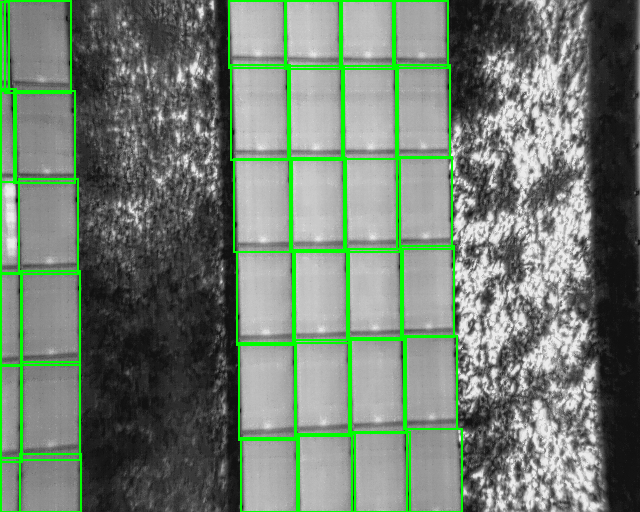

In [ ]:
from ultralytics import YOLO
from PIL import Image, ImageDraw

test_image_path = '/content/drive/MyDrive/PV_Thermography/yolo_dataset/images/train/029R.jpg'

# Make a prediction on the test image
results = model.predict(source=test_image_path, save=False)

# Visualize the results
image = Image.open(test_image_path)
draw = ImageDraw.Draw(image)

for result in results[0].boxes:
    x1, y1, x2, y2 = result.xyxy[0]
    if result.cls[0] == 1:  # Defected module
        draw.rectangle([(x1, y1), (x2, y2)], outline=(255, 0, 0), width=2)
    else:  # Non-defected module
        draw.rectangle([(x1, y1), (x2, y2)], outline=(0, 255, 0), width=2)

display(image)

In [ ]:
result

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8142])
data: tensor([[240.2767, 423.4998, 296.9324, 512.0000,   0.8142,   0.0000]])
id: None
is_track: False
orig_shape: (512, 640)
shape: torch.Size([1, 6])
xywh: tensor([[268.6046, 467.7499,  56.6558,  88.5002]])
xywhn: tensor([[0.4197, 0.9136, 0.0885, 0.1729]])
xyxy: tensor([[240.2767, 423.4998, 296.9324, 512.0000]])
xyxyn: tensor([[0.3754, 0.8271, 0.4640, 1.0000]])